<a href="https://colab.research.google.com/github/Vardhannn/ML/blob/main/ML_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ▪ Heart disease prediction:
**a.**  Implement a logistic regression model to predict whether an individual is suffering from heart disease or not

**b.** Evaluate and compare model performance using the following validation approaches:

1.   Validation set approach
2.   K-fold cross validation
3.   Stratified K-fold cross validation
4.   LOO strategy

**c.** Plot Confusion matrix

**d.** Report performance of the model in terms of the following metrics:
1.  Accuracy
2.  Precision-Recall
3.  F1 Score

**e.** Report your observations and explain when to use what type of approaches

In [ ]:
dataset_link = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ7y5hgCGX5S75yMki4ys6yGsdPVt3AEUS02bsfdofBWB8JX9tJoqMPmrfRU6HscW04CHYQ-FQXgdIE/pub?output=csv"

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv(dataset_link)
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Replace missing values
# dataset.fillna(dataset.mean())
# dataset

# Model creation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Preprocess the dataset
X = dataset.iloc[:, :-1]

# convert target variable to binary
y = dataset.iloc[:, -1].apply(lambda x: 1 if x > 0 else 0)

class_names =['Abnormal','Normal']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
print("Model Created Sucessfully")

print(classification_report(y_test, y_pred, target_names=class_names))



Model Created Sucessfully
              precision    recall  f1-score   support

    Abnormal       0.85      0.72      0.78       102
      Normal       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



# Evaluate model performance

**Validation set approach**

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy (Valudation set approach):", accuracy)


print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy (Valudation set approach): 0.7951219512195122
              precision    recall  f1-score   support

    Abnormal       0.85      0.72      0.78       102
      Normal       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



**using K-fold cross validation**

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
count =0
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    scores.append(accuracy_score(y_test, y_pred))
    print("Performance measures for Fold Number: ", count+1)
    print(classification_report(y_test, y_pred, target_names=class_names))
    count = count + 1
print("Accuracy (K-fold cross validation):", np.mean(scores))


Performance measures for Fold Number:  1
              precision    recall  f1-score   support

    Abnormal       0.85      0.72      0.78       102
      Normal       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Performance measures for Fold Number:  2
              precision    recall  f1-score   support

    Abnormal       0.87      0.86      0.86       100
      Normal       0.87      0.88      0.87       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

Performance measures for Fold Number:  3
              precision    recall  f1-score   support

    Abnormal       0.86      0.79      0.82        91
      Normal       0.84      0.89      0.87       114

    accuracy                           0.85       205
   ma

**using stratified K-fold cross validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=class_names))
print("Accuracy (Stratified K-fold cross validation):", np.mean(scores))

              precision    recall  f1-score   support

    Abnormal       0.83      0.84      0.84       100
      Normal       0.85      0.84      0.84       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205

              precision    recall  f1-score   support

    Abnormal       0.90      0.82      0.86       100
      Normal       0.84      0.91      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205

              precision    recall  f1-score   support

    Abnormal       0.87      0.78      0.82       100
      Normal       0.81      0.89      0.85       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

              preci

**using LOO strategy**

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = []
count = 0
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)
    print("Fold Number ", count)
    count = count + 1
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy is ", accuracy_score(y_test, y_pred))
    scores.append(accuracy_score(y_test, y_pred))    
    if count == 5:
      break
print("Accuracy (LOO strategy):", np.mean(scores))

(1024, 13) (1, 13) (1024,) (1,)
Fold Number  0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  1.0
(1024, 13) (1, 13) (1024,) (1,)
Fold Number  1


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is  1.0
(1024, 13) (1, 13) (1024,) (1,)
Fold Number  2


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy is  1.0
(1024, 13) (1, 13) (1024,) (1,)
Fold Number  3
Accuracy is  1.0
(1024, 13) (1, 13) (1024,) (1,)
Fold Number  4
Accuracy is  1.0
Accuracy (LOO strategy): 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Plot Confusion matrix

<AxesSubplot:>

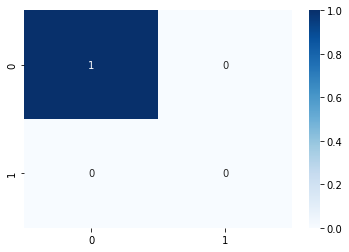

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred,labels=[0,1])

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Report performance of the model in terms of the following metrics:

1. Accuracy
2. Precision
3. Recall
4. F1 Score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision_recall_fscore = precision_recall_fscore_support(y_test, y_pred, average='binary')

print("Accuracy:", accuracy)
print("Precision:", precision_recall_fscore[0])
print("Recall:", precision_recall_fscore[1])
print("F1-score:", precision_recall_fscore[2])

Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Report your observations and explain when to use what type of approaches

Observations:

1. **Validation Set Approach**: This approach randomly splits the data into a training set and a validation set. The model is trained on the training set and evaluated on the validation set. This approach is fast and easy to implement but can be biased and inefficient when the data size is small.

2. **K-Fold Cross Validation**: This approach randomly splits the data into k equal-sized folds. The model is trained on k-1 folds and evaluated on the remaining fold. This process is repeated k times, and the evaluation scores are averaged. This approach is more efficient and less biased than the validation set approach, but it can still suffer from variance when the data size is small.

3. **Stratified K-Fold Cross Validation**: This approach is the same as the K-Fold Cross Validation, but it ensures that each fold has a similar distribution of classes as the original data. This approach is suitable for imbalanced datasets.

4. **Leave-One-Out (LOO) Cross Validation**: This approach trains the model on n-1 samples and evaluates on the remaining sample. This process is repeated n times, where n is the number of samples in the data. This approach is suitable for small datasets but can be computationally expensive.

In terms of model evaluation, the accuracy metric can be used when the dataset is balanced. However, when the dataset is imbalanced, the precision-recall trade-off becomes important. In such cases, the F1-score can be used, which is the harmonic mean of precision and recall.

In general, the choice of approach depends on the size and nature of the dataset. When the dataset is large, K-Fold Cross Validation or Stratified K-Fold Cross Validation can be used, while LOO Cross Validation can be used for small datasets. The validation set approach can be used for quick and dirty evaluations, but it may not be as reliable as the other approaches.